In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline 

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

In [3]:
df = pd.read_csv(url,header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### Data Pre-processing :
##### it is about making data ready for further use

In [9]:
df.dropna(subset=["price"],axis=0,inplace=True)

In [10]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
df.rename(columns={"city-L/100km":"city-l/100km"}, inplace=True)

In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
df.replace("?", np.nan, inplace = True)
df.head(5)
df["price"] = df["price"].astype("float")

In [14]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [15]:

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [16]:
df['fuel-type'].value_counts().idxmax()

'gas'

In [17]:
df["length"].head()

0    168.8
1    168.8
2    171.2
3    176.6
4    176.6
Name: length, dtype: float64

In [18]:
df.isnull().values.any()

True

In [19]:
df["price"].min()


5118.0

# Bining

In [20]:
bins = np.linspace(min(df["price"]),max(df["price"]),4)
bins


array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [21]:
group_name = ["low","medium","high"]

In [22]:
df["price-binned"] = pd.cut(df["price"],bins,labels=group_name,include_lowest=True)

In [23]:
df[["price","price-binned"]].tail()

,price,price-binned
200,16845.0,low
201,19045.0,medium
202,21485.0,medium
203,22470.0,medium
204,22625.0,medium


In [24]:
df.dtypes

symboling               int64
normalized-losses      object
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ratio     float64
horsepower             object
peak-rpm               object
city-mpg                int64
highway-mpg             int64
price                 float64
price-binned         category
dtype: object

In [25]:
df["price-binned"] = df["price-binned"].astype("object")

In [26]:
df["price-binned"].value_counts()

low       171
medium     18
high       12
Name: price-binned, dtype: int64

In [27]:
pd.get_dummies(df["fuel-type"]).head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
df["stroke"].head()

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: object

In [29]:
missing_data = df.isnull()

In [30]:
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
price-binned          object
dtype: object

In [32]:
df["stroke"] = df["stroke"].astype("float")

In [33]:
df["stroke"].value_counts().idxmax()

3.4

In [34]:
df["stroke"].replace(np.nan,df["stroke"].mean(),inplace=True)

In [35]:
df["stroke"].isnull().value_counts()

False    205
Name: stroke, dtype: int64

In [36]:
df["price-binned"].head()

0    low
1    low
2    low
3    low
4    low
Name: price-binned, dtype: object

In [37]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205,201,205.000000,205.000000,203,203,205.000000,205.000000,201.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,8,38,NaN,NaN,59,23,NaN,NaN,NaN,3
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,mpfi,3.62,NaN,NaN,68,5500,NaN,NaN,NaN,low
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,94,23,NaN,NaN,19,37,NaN,NaN,NaN,171
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,NaN,NaN,3.255423,10.142537,NaN,NaN,25.219512,30.751220,13207.129353,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,NaN,NaN,0.313597,3.972040,NaN,NaN,6.542142,6.886443,7947.066342,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,NaN,NaN,2.070000,7.000000,NaN,NaN,13.000000,16.000000,5118.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,NaN,NaN,3.110000,8.600000,NaN,NaN,19.000000,25.000000,7775.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,NaN,NaN,3.290000,9.000000,NaN,NaN,24.000000,30.000000,10295.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,NaN,NaN,3.410000,9.400000,NaN,NaN,30.000000,34.000000,16500.000000,NaN


In [38]:
df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

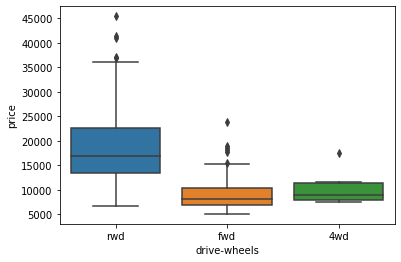

In [39]:
sns.boxplot(x="drive-wheels",y="price",data=df)

Text(0, 0.5, 'price')

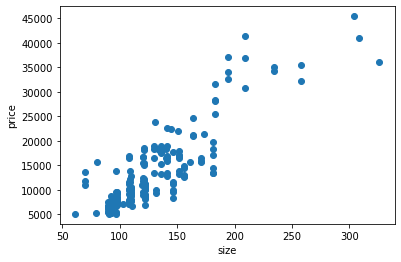

In [40]:
x=df["engine-size"]
y=df["price"]
plt.scatter(x,y)
plt.xlabel("size")
plt.ylabel("price")

# Grouping data


In [41]:
df_test = df[["drive-wheels","body-style","price"]]
df_grp = df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()

In [42]:
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [43]:
df_pivot = df_grp.pivot(index='drive-wheels',columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

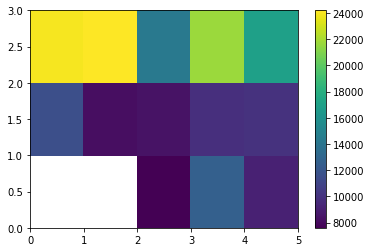

In [44]:
plt.pcolor(df_pivot)
plt.colorbar()
plt.show()

### Correlation

(0, 56377.05262167303)

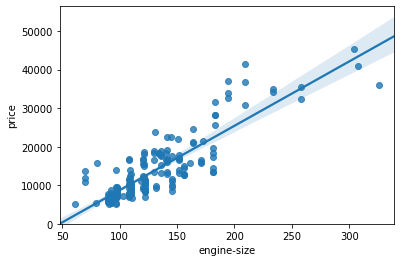

In [45]:
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

In [46]:
df["peak-rpm"] = df["peak-rpm"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")

(0, 47436.208930621644)

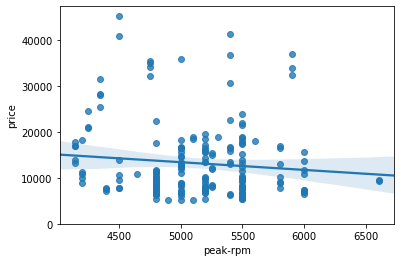

In [47]:
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

In [48]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.008689,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.160944,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.129522,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.182939,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,-0.055351,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.168783,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.203094,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
stroke,-0.008689,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,1.000000,0.186105,0.090170,-0.068288,-0.042179,-0.043961,0.082269
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.186105,1.000000,-0.205874,-0.436221,0.324701,0.265201,0.071107
horsepower,0.071622,0.352297,0.555003,0.642482,-0.110711,0.751034,0.810773,0.090170,-0.205874,1.000000,0.130971,-0.803620,-0.770908,0.810533


### Correlation - Statistics
#### pearson correlation

In [49]:
df["horsepower"].isnull().value_counts()
df["horsepower"].replace(np.nan,df["horsepower"].mean(),inplace=True)
df["price"].replace(np.nan,df["price"].mean(),inplace=True)

In [50]:
x,y=df["horsepower"],df["price"]
scipy.stats.pearsonr(x, y)

(0.7579169537498175, 1.6076703978131702e-39)

In [51]:
df["price-binned"].value_counts().idxmax()

'low'

In [52]:
df["price-binned"].replace(np.nan,df["price-binned"].value_counts().idxmax(),inplace=True)

In [53]:
df["price"].isnull().value_counts()

False    205
Name: price, dtype: int64

#### Model Development

In [54]:
#simple linear regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

In [57]:
X = df[["highway-mpg"]]

In [58]:
Y = df["price"]

In [59]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
Yhat = lm.predict(X)
Yhat[:5]

array([16166.94140528, 16166.94140528, 16955.96802513, 13799.86154571,
       20112.07450456])

In [61]:
#X = i + c.x

In [62]:
lm.intercept_

37470.66014138311

In [64]:
lm.coef_

array([-789.02661986])

In [65]:
#multiple linear regression

In [66]:
z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [67]:
lm.fit(z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
Yhat=lm.predict(z)

In [71]:
Yhat[:5]

array([13857.52067002, 13857.52067002, 17973.17191244, 10572.49349974,
       15912.7292767 ])

In [72]:
#model relation

(0, 48223.710680521996)

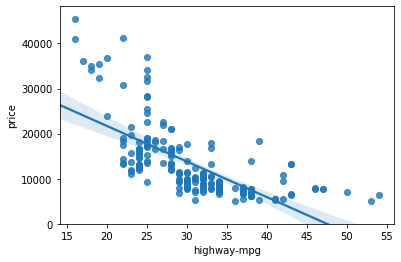

In [77]:
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

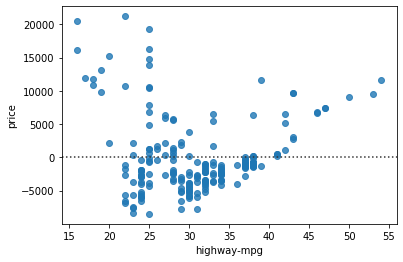

In [78]:
sns.residplot(df['highway-mpg'],df['price'])

In [79]:
#distribution plot

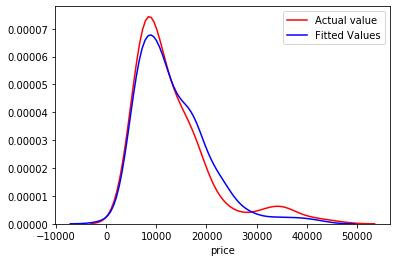

In [86]:
axl = sns.distplot(df['price'],hist=False,color="r",label="Actual value")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=axl)

AxesSubplot(0.125,0.125;0.775x0.755)
